In [1]:
import numpy as np
import pandas as pd

In [86]:
kidney_disease_medical_data = pd.read_csv('kidney_disease.csv')

In [3]:
kidney_disease_medical_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease#
- age - age
- bp - blood pressure
- sg - specific gravity
- al - albumin
- su - sugar
- rbc - red blood cells
- pc - pus cell
- pcc - pus cell clumps
- ba - bacteria
- bgr - blood glucose random
- bu - blood urea
- sc - serum creatinine
- sod - sodium
- pot - potassium
- hemo - hemoglobin
- pcv - packed cell volume
- wc - white blood cell count
- rc - red blood cell count
- htn - hypertension
- dm - diabetes mellitus
- cad - coronary artery disease
- appet - appetite
- pe - pedal edema
- ane - anemia
- class - class

# How is Chronic Kidney Disease diagnosed? 
Source - https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/diagnosis-treatment/drc-20354527
- Blood tests. 
    - Kidney function tests look for the level of waste products, such as creatinine and urea, in your blood.
- Urine tests. 
    - Analyzing a sample of your urine can reveal abnormalities that point to chronic kidney failure and help identify the cause of chronic kidney disease.
- Imaging tests. 
    - Your doctor might use ultrasound to assess your kidneys' structure and size. Other imaging tests might be used in some cases.
- Removing a sample of kidney tissue for testing

In [4]:
kidney_disease_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
kidney_disease_medical_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
kidney_disease_medical_data.describe(include='object')

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,44,92,49,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,248


<AxesSubplot:title={'center':'Missing Values'}>

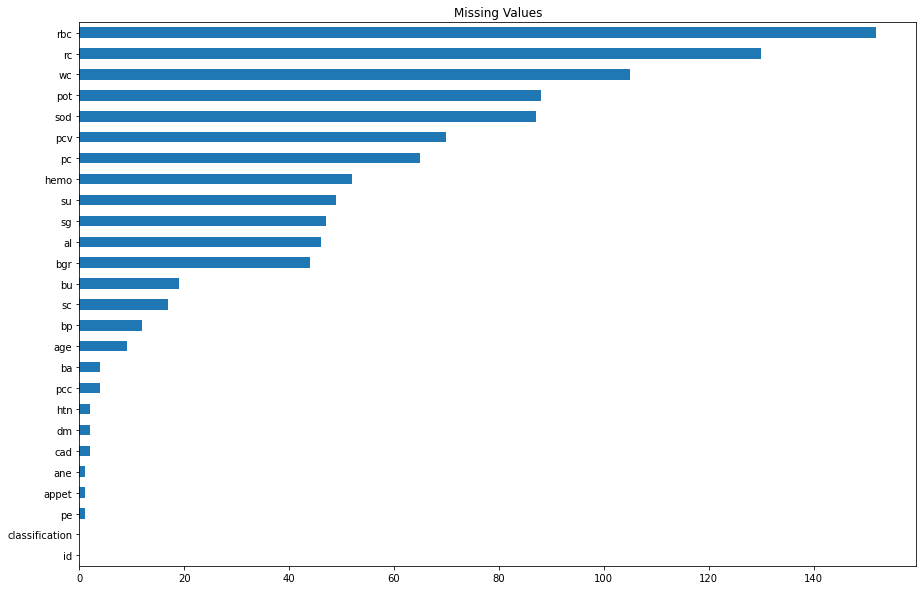

In [8]:
kidney_disease_medical_data.isna().sum().sort_values(ascending=True).plot(kind='barh', figsize=(15,10), title='Missing Values')

In [87]:
for c in kidney_disease_medical_data.select_dtypes('object').columns:
    print(f"---- {c} ---")
    print(kidney_disease_medical_data[c].unique())

---- rbc ---
[nan 'normal' 'abnormal']
---- pc ---
['normal' 'abnormal' nan]
---- pcc ---
['notpresent' 'present' nan]
---- ba ---
['notpresent' 'present' nan]
---- pcv ---
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
---- wc ---
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900'

In [88]:
# clean tab data
kidney_disease_medical_data = kidney_disease_medical_data.replace(r'\t', '', regex=True)

In [89]:
# replace ? with 0

kidney_disease_medical_data = kidney_disease_medical_data.replace('?', '0')

In [90]:
for c in kidney_disease_medical_data.select_dtypes('object').columns:
    print(f"---- {c} ---")
    print(kidney_disease_medical_data[c].unique())

---- rbc ---
[nan 'normal' 'abnormal']
---- pc ---
['normal' 'abnormal' nan]
---- pcc ---
['notpresent' 'present' nan]
---- ba ---
['notpresent' 'present' nan]
---- pcv ---
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '0' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
---- wc ---
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '0' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100'

In [91]:
# convert pcv, wc and rc into float
kidney_disease_medical_data[['pcv', 'wc', 'rc']] = kidney_disease_medical_data[['pcv', 'wc', 'rc']].astype(float)

In [36]:
kidney_disease_medical_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,330.000000,295.000000,270.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.766667,8377.627119,4.690000
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.228118,2979.928513,1.062758
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [37]:
kidney_disease_medical_data.describe(include='object')

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,398,398,398,399,399,399,400
unique,2,2,2,2,2,3,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,201,259,354,374,251,261,364,317,323,339,250


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

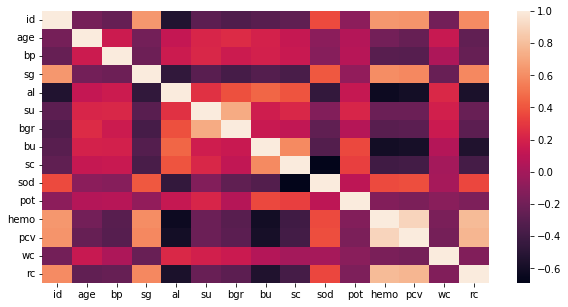

In [39]:
# diabetes - secondary cause
# hypertension (high blood pressure) - 2nd most common cause 
# coronary - pump blood to heart so if there is junk that can cause heart disease or cardiac arrest
# ckd - end stage renal disease (kidney not functioning need dialysis)
plt.figure(figsize=(10, 5))
sns.heatmap(kidney_disease_medical_data.corr())

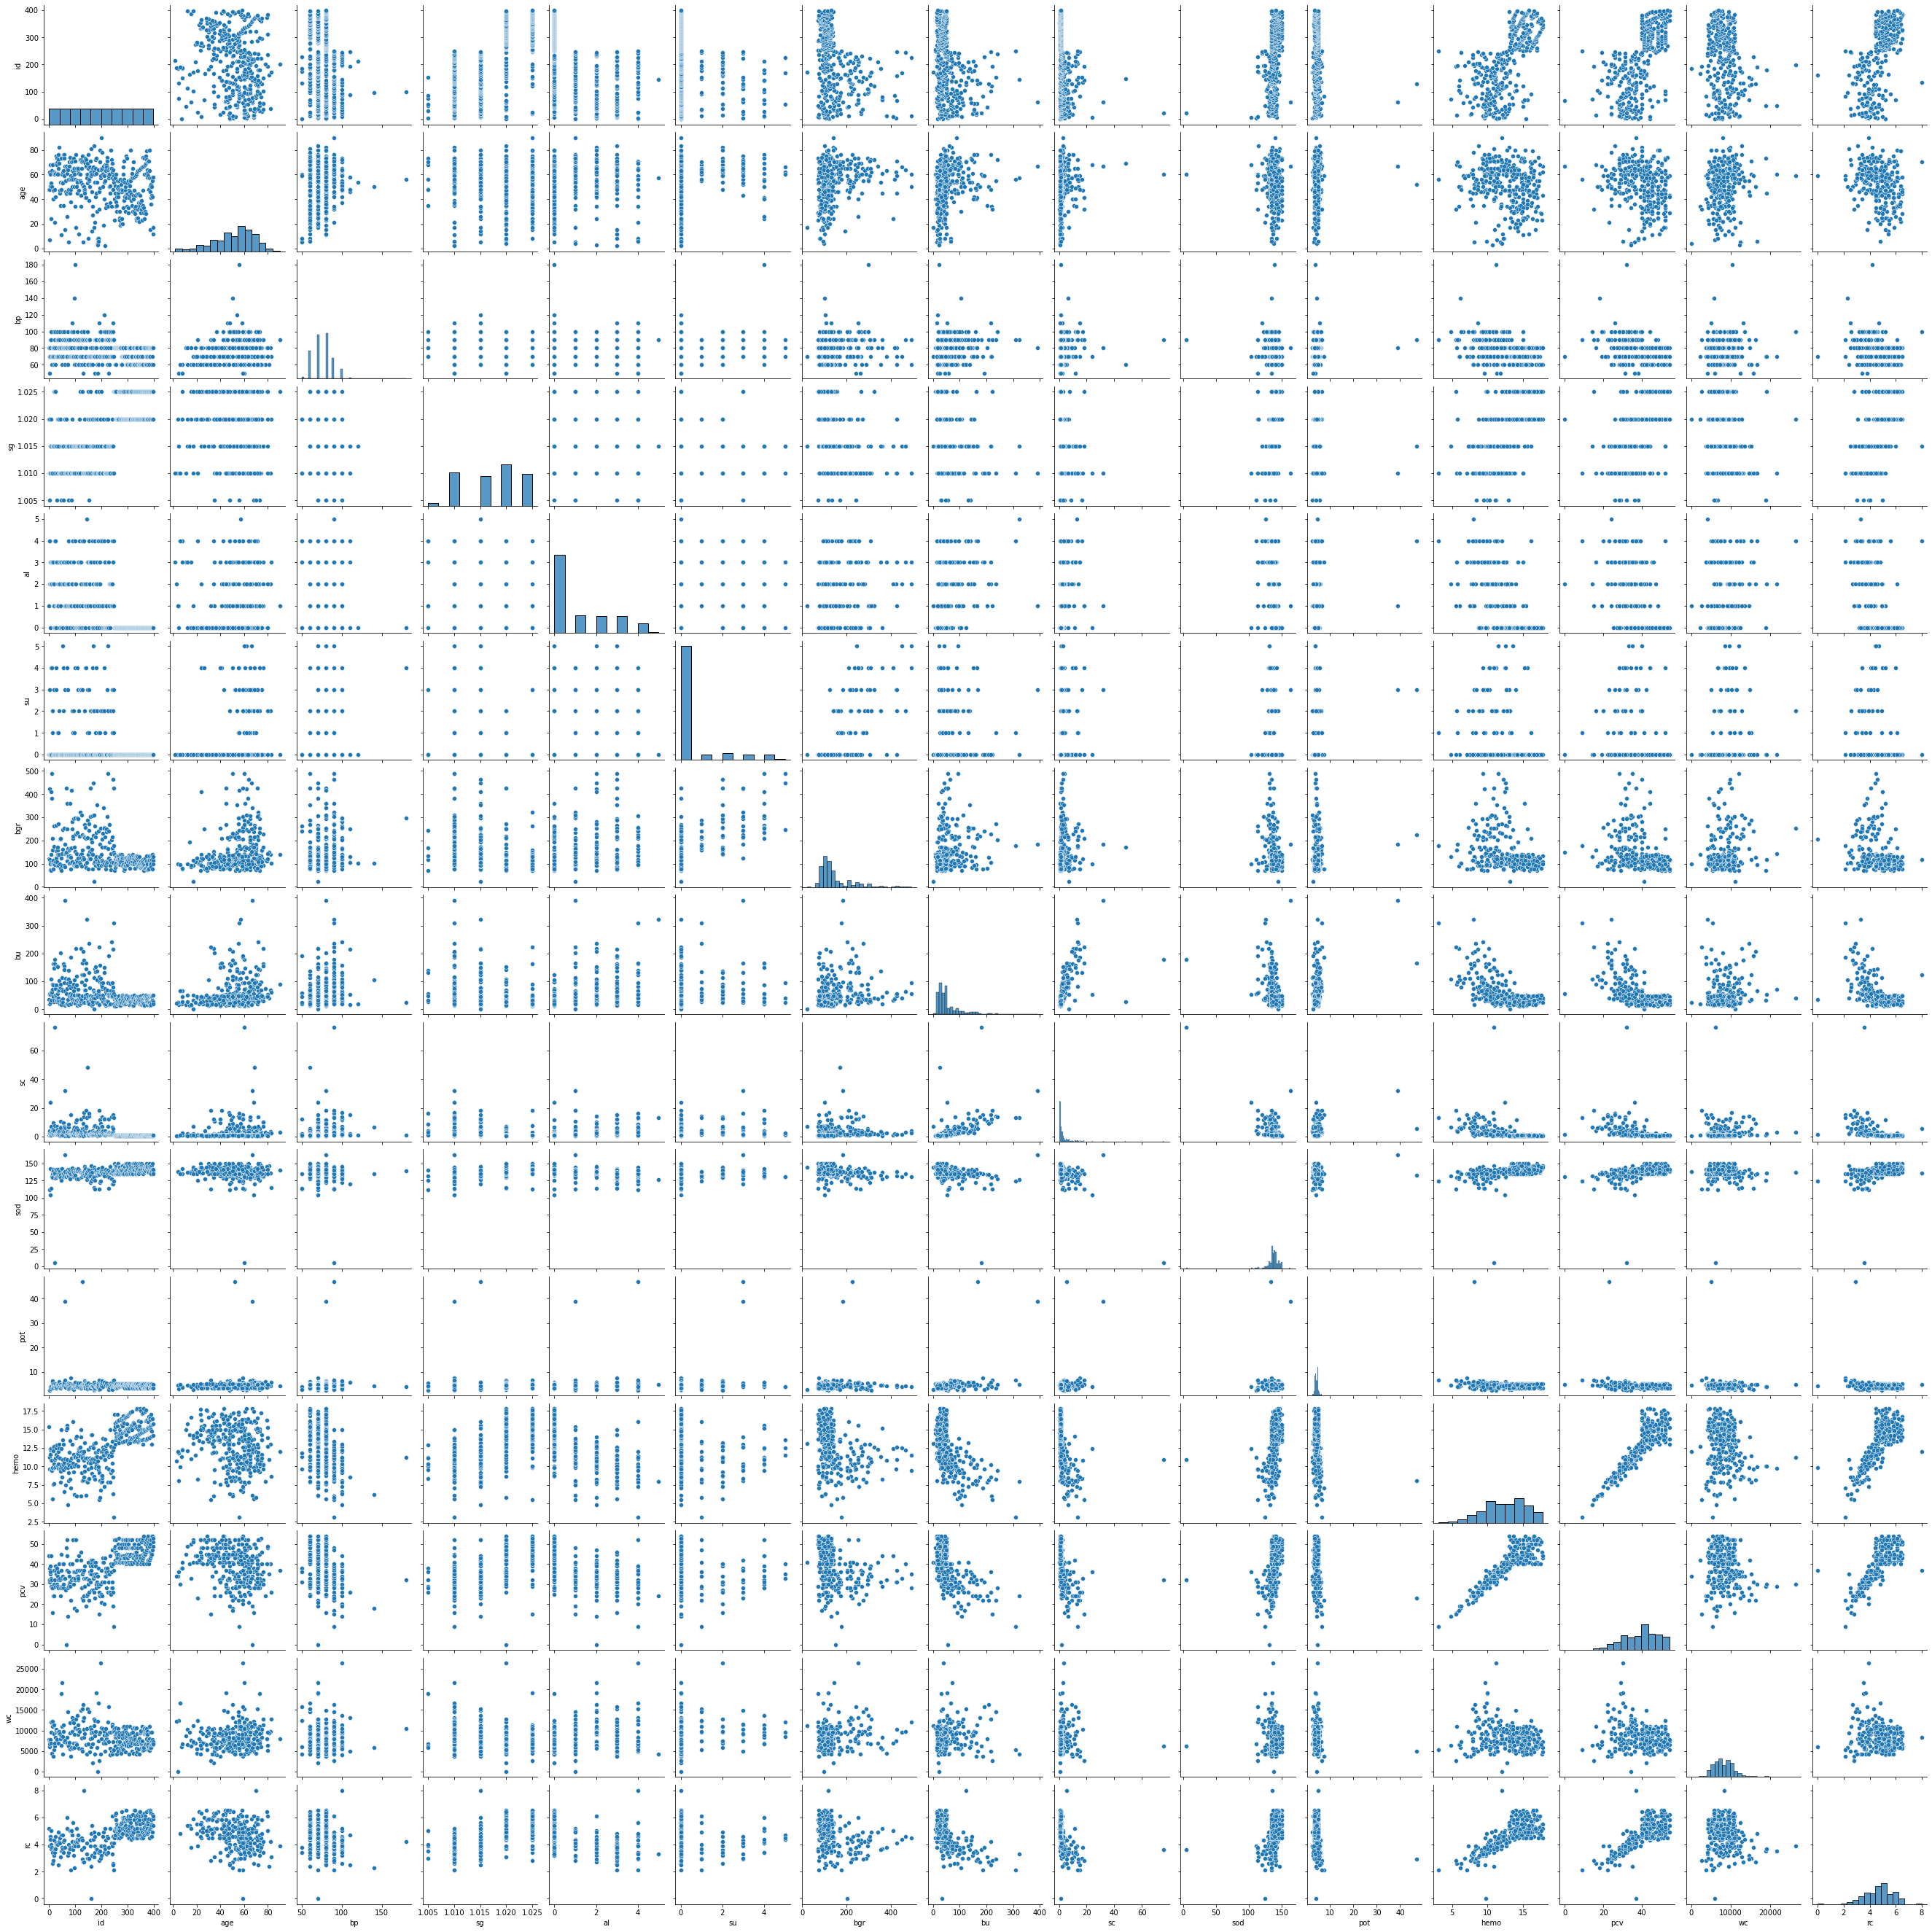

In [40]:
sns.pairplot(kidney_disease_medical_data)

In [42]:
kidney_disease_medical_data.isna().sum().to_frame('num_missing_vals')

,num_missing_vals
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [92]:
kidney_disease_medical_data['dm'].value_counts()

no      261
yes     136
 yes      1
Name: dm, dtype: int64

In [93]:
# remove space
kidney_disease_medical_data['dm'] = kidney_disease_medical_data['dm'].str.strip()

In [94]:
kidney_disease_medical_data['dm'].value_counts()

no     261
yes    137
Name: dm, dtype: int64

In [95]:
kidney_disease_medical_data['dm_1_0'] = np.where(kidney_disease_medical_data['dm']=='yes', 1, 0)

In [96]:
kidney_disease_medical_data['ckd_or_not'] = np.where(kidney_disease_medical_data['classification']=='ckd', 1, 0)

In [97]:
kidney_disease_medical_data['count'] = 1

In [98]:
pd.pivot_table(kidney_disease_medical_data, values='count', index='dm_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0)

ckd_or_not,0,1
dm_1_0,,
0,150,113
1,0,137


# Patients with diabetes have ckd
- Patients with diabetes have a 34% chance of having ckd
- Patients with hypertension have a 37% chance of having ckd

In [99]:
137/pd.pivot_table(kidney_disease_medical_data, values='count', index='dm_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0).sum().sum()

0.3425

In [100]:
kidney_disease_medical_data['htn_1_0'] = np.where(kidney_disease_medical_data['htn']=='yes', 1, 0)

In [101]:
147/pd.pivot_table(kidney_disease_medical_data, values='count', index='htn_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0).sum().sum()

0.3675

# What is the likelihood someone has coronary artery disease if they have ckd? 
- 8.5% chance of someone having CAD if they have CKD

In [102]:
kidney_disease_medical_data['cad_1_0'] = np.where(kidney_disease_medical_data['cad']=='yes', 1, 0)

In [103]:
pd.pivot_table(kidney_disease_medical_data, values='count', index='cad_1_0', columns='ckd_or_not', aggfunc='count', fill_value=0)

ckd_or_not,0,1
cad_1_0,,
0,150,216
1,0,34


In [64]:
34/400

0.085

In [66]:
kidney_disease_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    float64
 17  wc              295 non-null    flo

In [ ]:
# columns to train model on 
['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']

In [68]:
kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']].select_dtypes('object')

,rbc,cad,appet,htn,dm,ane,pe
0,NaN,no,good,yes,yes,no,no
1,NaN,no,good,no,no,no,no
2,normal,no,poor,no,yes,yes,no
3,normal,no,poor,yes,no,yes,yes
4,normal,no,good,no,no,no,no
...,...,...,...,...,...,...,...
395,normal,no,good,no,no,no,no
396,normal,no,good,no,no,no,no
397,normal,no,good,no,no,no,no
398,normal,no,good,no,no,no,no


In [70]:
kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']].select_dtypes(exclude='object').fillna(0)

,bp,rc,wc,pcv,sc,sod,pot,hemo,age
0,80.0,5.2,7800.0,44.0,1.2,0.0,0.0,15.4,48.0
1,50.0,0.0,6000.0,38.0,0.8,0.0,0.0,11.3,7.0
2,80.0,0.0,7500.0,31.0,1.8,0.0,0.0,9.6,62.0
3,70.0,3.9,6700.0,32.0,3.8,111.0,2.5,11.2,48.0
4,80.0,4.6,7300.0,35.0,1.4,0.0,0.0,11.6,51.0
...,...,...,...,...,...,...,...,...,...
395,80.0,4.9,6700.0,47.0,0.5,150.0,4.9,15.7,55.0
396,70.0,6.2,7800.0,54.0,1.2,141.0,3.5,16.5,42.0
397,80.0,5.4,6600.0,49.0,0.6,137.0,4.4,15.8,12.0
398,60.0,5.9,7200.0,51.0,1.0,135.0,4.9,14.2,17.0


In [104]:
# fill na with mean depending on column
def replaceNAWithMean(df, column):
    df[column] = df[column].fillna(df[column].mean())

In [105]:
def replaceNAWithMode(df, column):
    df[column] = df[column].fillna(df[column].mode()[0])

In [106]:
for col in kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']].select_dtypes(exclude='object').columns:
    replaceNAWithMean(kidney_disease_medical_data, col)

In [107]:
for col in kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']].select_dtypes('object').columns:
    replaceNAWithMode(kidney_disease_medical_data, col)

In [81]:
kidney_disease_medical_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,cad,appet,pe,ane,classification,dm_1_0,ckd_or_not,count,htn_1_0,cad_1_0
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,ckd,1,1,1,1,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,no,good,no,no,ckd,0,1,1,0,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,no,poor,no,yes,ckd,1,1,1,0,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,no,poor,yes,yes,ckd,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,ckd,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,notckd,0,0,1,0,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,notckd,0,0,1,0,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,notckd,0,0,1,0,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,no,good,no,no,notckd,0,0,1,0,0


In [108]:
# check for missing data
kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']].isna().sum()

bp       0
rbc      0
rc       0
wc       0
pcv      0
cad      0
appet    0
sc       0
sod      0
pot      0
hemo     0
htn      0
dm       0
ane      0
age      0
pe       0
dtype: int64

In [109]:
kidney_training_data = kidney_disease_medical_data[['bp', 'rbc', 'rc', 'wc', 'pcv', 'cad', 'appet', 'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'ane', 'age', 'pe']]

In [112]:
kidney_training_data.select_dtypes('object').columns

Index(['rbc', 'cad', 'appet', 'htn', 'dm', 'ane', 'pe'], dtype='object')

In [118]:
del kidney_training_data_final

In [119]:
X = pd.get_dummies(kidney_training_data, columns=['rbc', 'cad', 'appet', 'htn', 'dm', 'ane', 'pe'])
y = kidney_disease_medical_data['classification']

In [221]:
from sklearn.preprocessing import LabelEncoder

In [228]:
le = LabelEncoder()

In [229]:
y = le.fit_transform(y)

In [230]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [226]:
kidney_disease_medical_data['classification']

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [145]:
kidney_disease_medical_data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
from sklearn.model_selection import train_test_split

In [126]:
from sklearn.metrics import confusion_matrix, classification_report

In [127]:
import seaborn as sns

In [122]:
lr = LogisticRegression(max_iter=1000)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [232]:
from imblearn.over_sampling import SMOTE

In [233]:
sm = SMOTE()

In [234]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [235]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [236]:
lr_predictions = lr.predict(X_test)

In [237]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_predictions).ravel()

In [238]:
tn

75

In [239]:
tp

44

In [240]:
fp

1

In [241]:
fn

0

# Classification Metrics
- This wouldn't tell us much for an imbalanced dataset
- You could have a high accuracy, but you would still need to inspect the precision and recall.
- Minimize precision when we need to minimize false positives
    - In fraud, a model with a high amount of false positives would create an unpleasant customer experience and possibly cause them to churn.
- Minimize recall when we need to minimize false negatives
    - Failing to detect when someone has COVID-19 or Kidney disease could result in death.

# Accuracy
- $ \frac{TP+TN}{TP+TN+FP+FN} $
    

# Precision
- $ \frac{TP}{TP+FP} $
- No false positives would make this equation 1

# Recall
- $ \frac{TP}{TP+FN} $
- No false negatives would make this equation 1

# F1
- $ 2*\frac{\text{precision}*\text{recall}}{\text{precision}+\text{recall}} $
- harmonic mean of precision and recall.
- if recall and precision is 1 then this equation will be 1




In [242]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<AxesSubplot:>

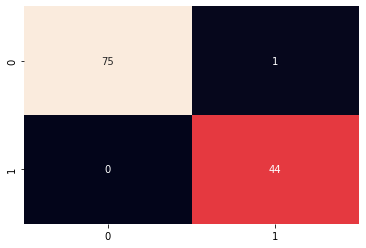

In [243]:
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, cbar=False)

In [244]:
# 98% accurate
lr.score(X_test, y_test)

0.9916666666666667

In [278]:
lr.score(X_train, y_train)

0.9511494252873564

In [341]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve, RocCurveDisplay

# Plot ROC and AUC 
- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
- When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly.

In [ ]:
RocCurveDisplay()

C:\Users\charlesd\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


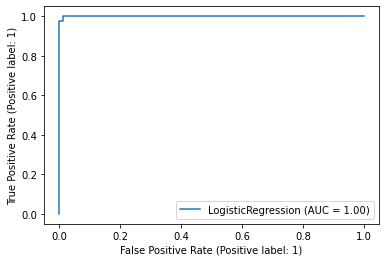

In [344]:
plot_roc_curve(lr, X_test, y_test)

# Feature Importance Analysis 
- Look at Coefficients
- Recursive Feature Elimination

## Look at feature importance based on coefficients 

In [374]:
lr.feature_names_in_

array(['bp', 'rc', 'wc', 'pcv', 'sc', 'sod', 'pot', 'hemo', 'age',
       'rbc_abnormal', 'rbc_normal', 'cad_no', 'cad_yes', 'appet_good',
       'appet_poor', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'ane_no',
       'ane_yes', 'pe_no', 'pe_yes'], dtype=object)

In [353]:
lr_feature_importance = dict(zip(lr.feature_names_in_, lr.coef_[0]))
lr_feature_importance

{'bp': -0.07824254091870761,
 'rc': 0.841115451578788,
 'wc': -0.00012647058444129693,
 'pcv': 0.014080145991232453,
 'sc': -1.5354217343865029,
 'sod': -0.05998973652431284,
 'pot': -0.7835737167746573,
 'hemo': 0.8903879131577223,
 'age': 0.019243908853669674,
 'rbc_abnormal': -0.9830499004181222,
 'rbc_normal': 0.7413232199543266,
 'cad_no': -0.06040012931625682,
 'cad_yes': -0.18132655121642424,
 'appet_good': 0.4977397425972845,
 'appet_poor': -0.739466423150071,
 'htn_no': 0.9362549862544338,
 'htn_yes': -1.1779816665660394,
 'dm_no': 1.2858066351453172,
 'dm_yes': -1.5275333155958186,
 'ane_no': 0.031964265302778946,
 'ane_yes': -0.2736909458033751,
 'pe_no': 0.9207336735685989,
 'pe_yes': -1.1624603539017186}

In [358]:
marklist = sorted(lr_feature_importance.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(marklist)

In [364]:
sortdict

{'dm_no': 1.2858066351453172,
 'htn_no': 0.9362549862544338,
 'pe_no': 0.9207336735685989,
 'hemo': 0.8903879131577223,
 'rc': 0.841115451578788,
 'rbc_normal': 0.7413232199543266,
 'appet_good': 0.4977397425972845,
 'ane_no': 0.031964265302778946,
 'age': 0.019243908853669674,
 'pcv': 0.014080145991232453,
 'wc': -0.00012647058444129693,
 'sod': -0.05998973652431284,
 'cad_no': -0.06040012931625682,
 'bp': -0.07824254091870761,
 'cad_yes': -0.18132655121642424,
 'ane_yes': -0.2736909458033751,
 'appet_poor': -0.739466423150071,
 'pot': -0.7835737167746573,
 'rbc_abnormal': -0.9830499004181222,
 'pe_yes': -1.1624603539017186,
 'htn_yes': -1.1779816665660394,
 'dm_yes': -1.5275333155958186,
 'sc': -1.5354217343865029}

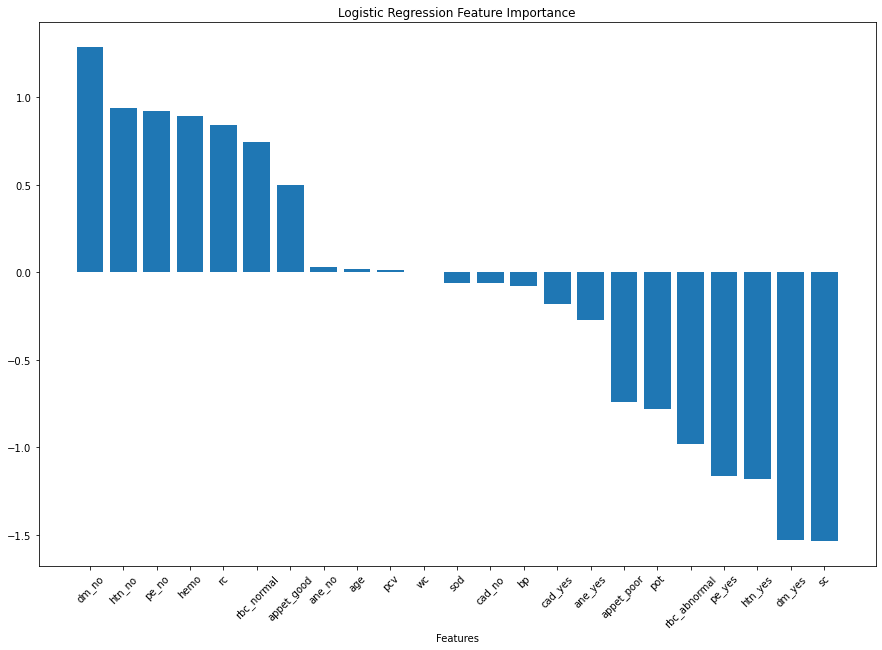

In [373]:
plt.figure(figsize=(15,10))
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Features')
plt.bar(sortdict.keys(), sortdict.values())
plt.xticks(rotation = 45)
plt.show()


# Recursive Feature Elimination

In [375]:
from sklearn.feature_selection import RFE

In [392]:
feature_selector = RFE(lr, n_features_to_select=10)

In [393]:
# fit features
feature_selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

# Train Logistic Regression on top 10 features and see if it improves model score 
- ideally all of this would be in a sklearn pipeline that would do this automatically
- You can also use gridsearch in the pipelne
    - see if l1 penalty would remove the need to do any feature selection since that would make less important coefficients zero

In [396]:
X_train.columns[feature_selector.support_]

Index(['rc', 'sc', 'hemo', 'rbc_abnormal', 'rbc_normal', 'htn_no', 'dm_no',
       'dm_yes', 'pe_no', 'pe_yes'],
      dtype='object')

In [398]:
lr.fit(X_train[X_train.columns[feature_selector.support_]], y_train)

LogisticRegression(max_iter=1000)

In [400]:
lr_predictions_rfe = lr.predict(X_test[X_train.columns[feature_selector.support_]])

In [407]:
lr.score(X_test[X_train.columns[feature_selector.support_]], y_test)

1.0

In [402]:
# precision, recall and f1 score is 1
print(classification_report(y_test, lr_predictions_rfe))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



<AxesSubplot:>

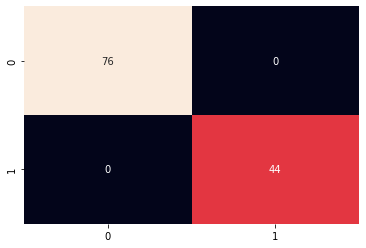

In [406]:
# perfectly predicted ckd
sns.heatmap(confusion_matrix(y_test, lr_predictions_rfe), annot=True, cbar=False)

C:\Users\charlesd\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


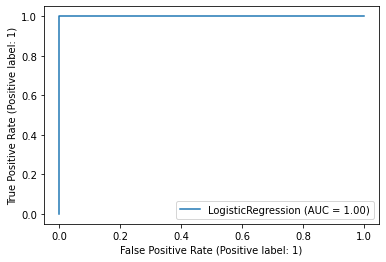

In [403]:
plot_roc_curve(lr, X_test[X_train.columns[feature_selector.support_]], y_test)

# Decision Tree 

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
dt = DecisionTreeClassifier()

In [245]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [246]:
dt_predictions = dt.predict(X_test)

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

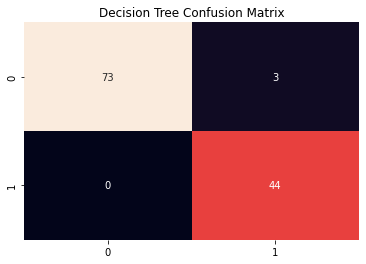

In [247]:
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, cbar=False)
plt.title('Decision Tree Confusion Matrix')

C:\Users\charlesd\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


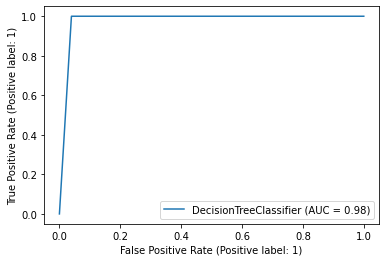

In [345]:
plot_roc_curve(dt, X_test, y_test)

In [248]:
dt.feature_importances_

array([0.0110218 , 0.00766284, 0.02165688, 0.01005747, 0.05178922,
       0.03944992, 0.        , 0.71564829, 0.01505036, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04182871, 0.        , 0.        , 0.07817169, 0.        ,
       0.00766284, 0.        , 0.        ])

In [249]:
dt.feature_names_in_

array(['bp', 'rc', 'wc', 'pcv', 'sc', 'sod', 'pot', 'hemo', 'age',
       'rbc_abnormal', 'rbc_normal', 'cad_no', 'cad_yes', 'appet_good',
       'appet_poor', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'ane_no',
       'ane_yes', 'pe_no', 'pe_yes'], dtype=object)

In [250]:
dict(zip(dt.feature_names_in_, dt.feature_importances_))

{'bp': 0.01102180313055647,
 'rc': 0.007662835249042146,
 'wc': 0.02165687632670739,
 'pcv': 0.010057471264367818,
 'sc': 0.051789218994463745,
 'sod': 0.039449917898193756,
 'pot': 0.0,
 'hemo': 0.7156482861400895,
 'age': 0.015050359052010917,
 'rbc_abnormal': 0.0,
 'rbc_normal': 0.0,
 'cad_no': 0.0,
 'cad_yes': 0.0,
 'appet_good': 0.0,
 'appet_poor': 0.0,
 'htn_no': 0.04182870970529767,
 'htn_yes': 0.0,
 'dm_no': 0.0,
 'dm_yes': 0.0781716869902286,
 'ane_no': 0.0,
 'ane_yes': 0.007662835249042146,
 'pe_no': 0.0,
 'pe_yes': 0.0}

In [277]:
dt.score(X_test, y_test)

0.975

In [251]:
from sklearn import tree

In [252]:
text_representation = tree.export_text(dt, feature_names=dt.feature_names_in_.tolist())
print(text_representation)

|--- hemo <= 12.92
|   |--- sc <= 1.15
|   |   |--- sod <= 139.14
|   |   |   |--- sc <= 1.05
|   |   |   |   |--- class: 0
|   |   |   |--- sc >  1.05
|   |   |   |   |--- ane_yes <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ane_yes >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- sod >  139.14
|   |   |   |--- pcv <= 36.88
|   |   |   |   |--- class: 0
|   |   |   |--- pcv >  36.88
|   |   |   |   |--- class: 1
|   |--- sc >  1.15
|   |   |--- class: 0
|--- hemo >  12.92
|   |--- dm_yes <= 0.50
|   |   |--- htn_no <= 0.50
|   |   |   |--- class: 0
|   |   |--- htn_no >  0.50
|   |   |   |--- wc <= 11750.00
|   |   |   |   |--- bp <= 85.00
|   |   |   |   |   |--- sc <= 7.29
|   |   |   |   |   |   |--- age <= 11.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age >  11.50
|   |   |   |   |   |   |   |--- age <= 18.50
|   |   |   |   |   |   |   |   |--- rc <= 5.05
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |

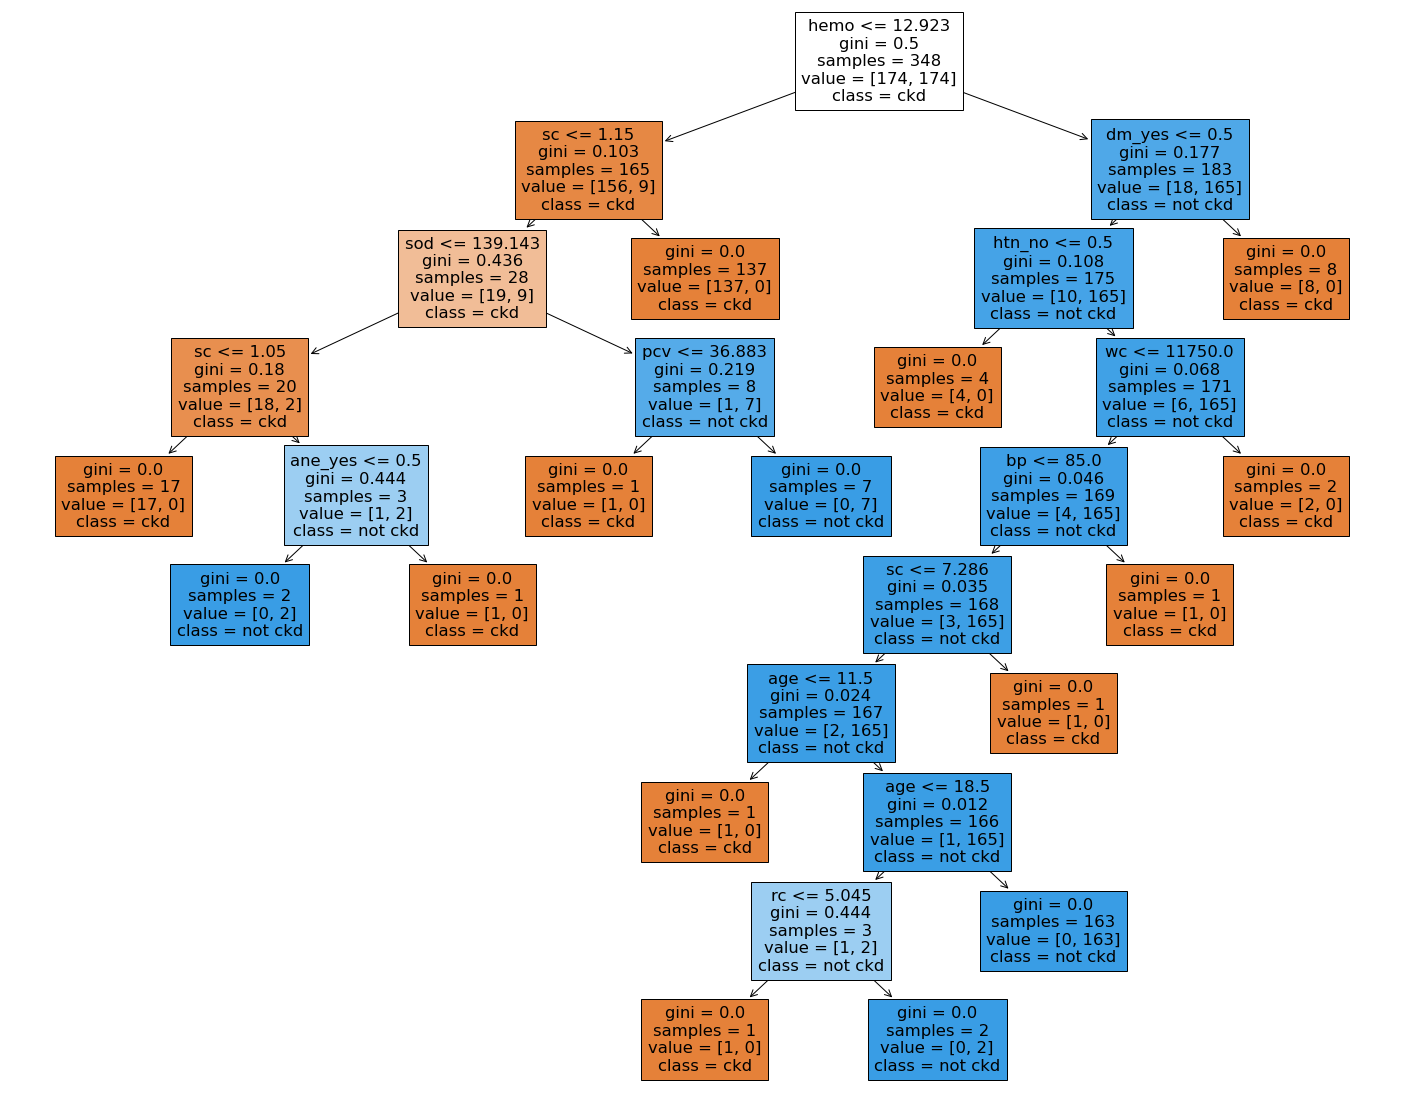

In [253]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=dt.feature_names_in_,  
                   class_names=['ckd','not ckd'],
                   filled=True)

In [254]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



# Neural Network
- output activation layer should output values between 0 and 1 or 0 to 1000 (sigmoid)

In [182]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [185]:
X.shape[1]

23

In [279]:
model = Sequential()

In [280]:
# add layers
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

In [281]:
(model
 .compile(loss='binary_crossentropy', 
          optimizer='sgd',
          metrics=['accuracy'])
)

In [282]:
model.fit(X_train, y_train, epochs=40, batch_size=10, verbose=0)

In [283]:
_, accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6333


In [284]:
accuracy

0.6333333253860474

In [262]:
nn_predictions = model.predict(X_test)

In [264]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [285]:
set(['h', 'h', 'e', 'e', 'r'])

{'e', 'h', 'r'}